<a href="https://colab.research.google.com/github/aarushkachhawa/Heart-Disease-Detection/blob/main/Heart_Disease_Detection_Paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("heart.csv") 
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
def clean_col(data, col_num):
  counter = 0
  data_vals = dict()

  for i in range(data.shape[0]):
    key = data.iloc[i, col_num]

    if(key not in data_vals.keys()):
      data_vals[key] = counter
      counter += 1

    data.iloc[i, col_num] = data_vals[key]
      

In [4]:
for i in range(data.shape[1]):
  col_type = type(data.iloc[0, i])
  if (col_type == str):
    clean_col(data, i)

data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,0,0.0,0,0
1,49,1,1,160,180,0,0,156,0,1.0,1,1
2,37,0,0,130,283,0,1,98,0,0.0,0,0
3,48,1,2,138,214,0,0,108,1,1.5,1,1
4,54,0,1,150,195,0,0,122,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,3,110,264,0,0,132,0,1.2,1,1
914,68,0,2,144,193,1,0,141,0,3.4,1,1
915,57,0,2,130,131,0,0,115,1,1.2,1,1
916,57,1,0,130,236,0,2,174,0,0.0,1,1


In [5]:
x = data.iloc[:, 0:11]
y = data.HeartDisease

In [6]:
# check for null values
data.isnull().sum() 

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

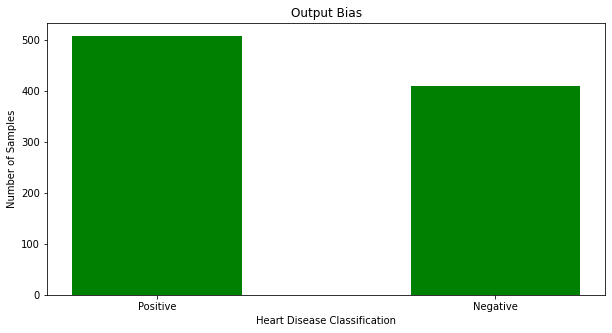

In [7]:
from matplotlib import pyplot as plt

# visualize output bias in the data set
data_dict = {'Positive':x[y==1].shape[0], 'Negative':x[y==0].shape[0]}
courses = list(data_dict.keys())
values = list(data_dict.values())
fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(courses, values, color ='green', width = 0.5)
plt.xlabel("Heart Disease Classification")
plt.ylabel("Number of Samples")
plt.title("Output Bias")
plt.show()

In [8]:
from sklearn.utils import resample 

# upsampling data to remove output bias
x1 = data[y == 0] # Minority Class which needs to be upsampled
x2 = data[y == 1] # Majority Class which stays the same

if(x1.shape[0] < x2.shape[0]):
  x1_upsampled = resample(x1, random_state=42, n_samples=x2.shape[0])
  x_upsampled = pd.concat([x1_upsampled, x2])

  x = x_upsampled.iloc[:, 0:11]
  y = x_upsampled.HeartDisease



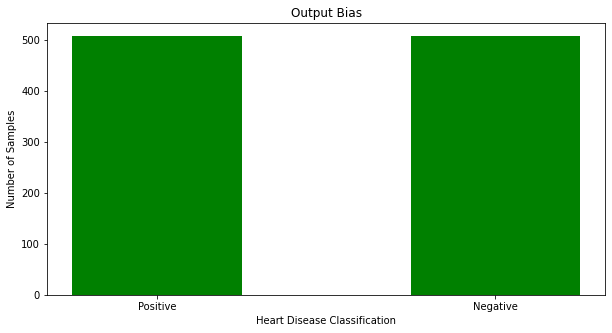

In [9]:
data_dict = {'Positive':x[y==1].shape[0], 'Negative':x[y==0].shape[0]}
classification = list(data_dict.keys())
values = list(data_dict.values())
fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(classification, values, color ='green', width = 0.5)
plt.xlabel("Heart Disease Classification")
plt.ylabel("Number of Samples")
plt.title("Output Bias")
plt.show()

[]

<Figure size 2160x1440 with 0 Axes>

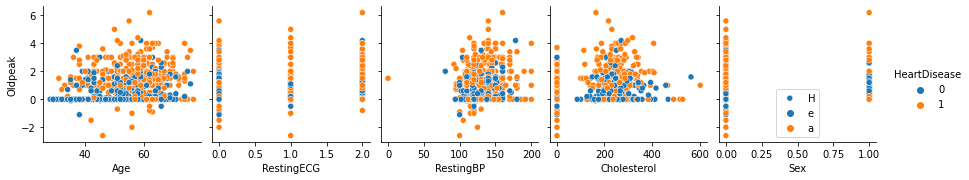

In [32]:
# Data visualization with pair plots
import matplotlib.pyplot as plt
import seaborn as sns

# Chart 1 
plt.figure(figsize=(30,20))
sns.pairplot(data, hue="HeartDisease", x_vars=["Age", "RestingECG", "RestingBP", "Cholesterol", "Sex"], y_vars=["Oldpeak"])
plt.legend("HeartDisease")
plt.plot()

[]

<Figure size 2160x1440 with 0 Axes>

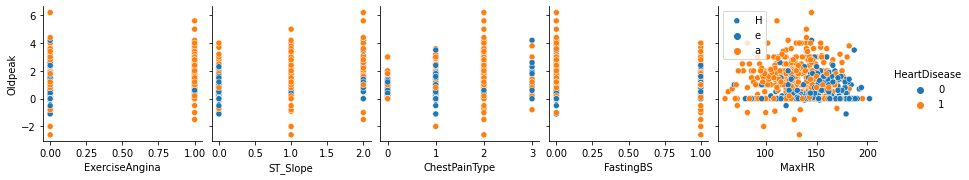

In [33]:
# Chart 2 
plt.figure(figsize=(30,20))
sns.pairplot(data, hue="HeartDisease", x_vars=["ExerciseAngina", "ST_Slope", "ChestPainType", "FastingBS", "MaxHR"], y_vars=["Oldpeak"])
plt.legend("HeartDisease")
plt.plot()

In [19]:
# correlation coefficiants of all numerical attributes
cormat = data.corr()
round(cormat, 2)


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.00,0.25,-0.10,0.20,-0.38,0.26,0.28
RestingBP,0.25,1.00,0.10,0.07,-0.11,0.16,0.11
Cholesterol,-0.10,0.10,1.00,-0.26,0.24,0.05,-0.23
FastingBS,0.20,0.07,-0.26,1.00,-0.13,0.05,0.27
MaxHR,-0.38,-0.11,0.24,-0.13,1.00,-0.16,-0.40
Oldpeak,0.26,0.16,0.05,0.05,-0.16,1.00,0.40
HeartDisease,0.28,0.11,-0.23,0.27,-0.40,0.40,1.00


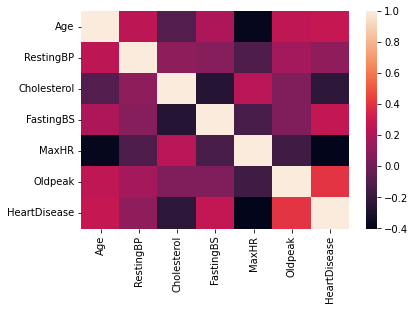

In [18]:
# correlation matrix onverted to a heat map 
sns.heatmap(cormat)

In [68]:
x_pos = x[y==1]
x_neg = x[y==0]

x_pos

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
1,49,1,1,160,180,0,0,156,0,1.0,1
3,48,1,2,138,214,0,0,108,1,1.5,1
8,37,0,2,140,207,0,0,130,1,1.5,1
11,58,0,0,136,164,0,1,99,1,2.0,1
13,49,0,2,140,234,0,0,140,1,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
912,57,1,2,140,241,0,0,123,1,0.2,1
913,45,0,3,110,264,0,0,132,0,1.2,1
914,68,0,2,144,193,1,0,141,0,3.4,1
915,57,0,2,130,131,0,0,115,1,1.2,1


In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

from keras.utils.np_utils import to_categorical


In [70]:
# Function for examining scores

def train_val(y_train, y_train_pred, y_test, y_pred):
    
    scores = {"train_set": {"Accuracy" : accuracy_score(y_train, y_train_pred),
                            "Precision" : precision_score(y_train, y_train_pred),
                            "Recall" : recall_score(y_train, y_train_pred),                          
                            "f1" : f1_score(y_train, y_train_pred)},
    
              "test_set": {"Accuracy" : accuracy_score(y_test, y_pred),
                           "Precision" : precision_score(y_test, y_pred),
                           "Recall" : recall_score(y_test, y_pred),                          
                           "f1" : f1_score(y_test, y_pred)}}
    
    return pd.DataFrame(scores)

In [71]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import plot_confusion_matrix, r2_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix, accuracy_score

from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression

!pip3 install colorama
import colorama
from colorama import Fore, Style  # maakes strings colored
!pip3 install termcolor
from termcolor import colored

from sklearn.model_selection import cross_val_score

In [72]:
# feature scaling 
scaler = MinMaxScaler()
scaler

X_train_scaled = scaler.fit_transform(X_train) # First fit the model then transform
X_test_scaled = scaler.transform(X_test) # Model already fit so use transform instead

In [73]:

# Random forest Classifier with default parameters 

def randomForestClassifier(X_train, X_test, X_train_scaled, X_test_scaled, y_train, y_test):

  RF_model = RandomForestClassifier(class_weight="balanced", random_state=101)
  RF_model.fit(X_train_scaled, y_train)


  y_pred = RF_model.predict(X_test_scaled)
  y_train_pred = RF_model.predict(X_train_scaled)

  rf_f1 = f1_score(y_test, y_pred)
  rf_acc = accuracy_score(y_test, y_pred)
  rf_recall = recall_score(y_test, y_pred)
  rf_auc = roc_auc_score(y_test, y_pred)

  print(confusion_matrix(y_test, y_pred))
  print("\033[1m--------------------------------------------------------\033[0m")
  print(classification_report(y_test, y_pred))
  print("\033[1m--------------------------------------------------------\033[0m")

  plot_confusion_matrix(RF_model, X_test_scaled, y_test)

  train_val(y_train, y_train_pred, y_test, y_pred)

  plot_roc_curve(RF_model, X_test_scaled, y_test);

  plot_precision_recall_curve(RF_model, X_test_scaled, y_test);

  print(cross_val_score(RF_model, X_train, y_train))


[[103   7]
 [  7  87]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       110
           1       0.93      0.93      0.93        94

    accuracy                           0.93       204
   macro avg       0.93      0.93      0.93       204
weighted avg       0.93      0.93      0.93       204

--------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use o

[0.90797546 0.89570552 0.90123457 0.91358025 0.9382716 ]


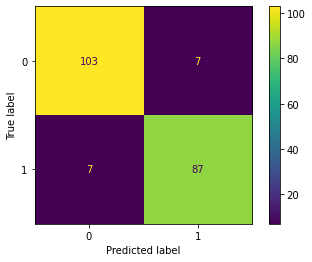

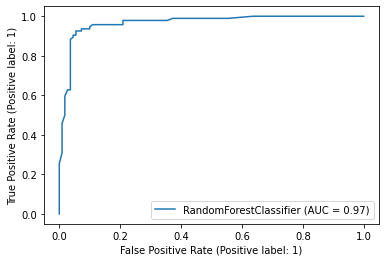

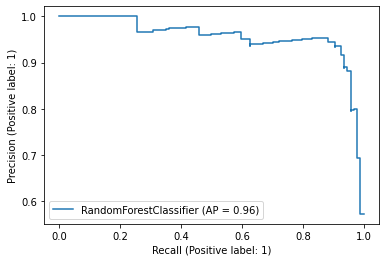

In [74]:
randomForestClassifier(X_train, X_test, X_train_scaled, X_test_scaled, y_train, y_test)

In [75]:
# Gradient Boosting model with best parameters using GridSearchCV
# Computing the accuracy scores on train and validation sets when training with different learning rates

def gradientBoostingClassifier(X_train, X_test, X_train_scaled, X_test_scaled, y_train, y_test):

  learning_rates = [0.05, 0.1, 0.15, 0.25, 0.5, 0.6, 0.75, 0.85, 1]
  accuracy_scores = []

  for learning_rate in learning_rates:
      gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, random_state=42)
      gb.fit(X_train, y_train)
      print("Learning rate: ", learning_rate)
      print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
      print("Accuracy score (test): {0:.3f}".format(gb.score(X_test, y_test)))
      accuracy_scores.append([learning_rate, gb.score(X_test, y_test)])
      print()
  
  max_learning_rate = -1
  test_accuracy = -1.00

  for i in accuracy_scores:
    if (i[1] > test_accuracy):
      max_learning_rate = i[0]
      test_accuracy = i[1]

  GB_model = GradientBoostingClassifier(learning_rate = max_learning_rate, random_state=42)
  GB_model.fit(X_train_scaled, y_train)

  y_pred = GB_model.predict(X_test_scaled)
  y_train_pred = GB_model.predict(X_train_scaled)

  gb_grid_f1 = f1_score(y_test, y_pred)
  gb_grid_acc = accuracy_score(y_test, y_pred)
  gb_grid_recall = recall_score(y_test, y_pred)
  gb_grid_auc = roc_auc_score(y_test, y_pred)

  print(confusion_matrix(y_test, y_pred))
  print("\033[1m--------------------------------------------------------\033[0m")
  print(classification_report(y_test, y_pred))
  print("\033[1m--------------------------------------------------------\033[0m")

  plot_confusion_matrix(GB_model, X_test_scaled, y_test)

  train_val(y_train, y_train_pred, y_test, y_pred)

  plot_roc_curve(GB_model, X_test_scaled, y_test);

  plot_precision_recall_curve(GB_model, X_test_scaled, y_test);


Learning rate:  0.05
Accuracy score (training): 0.908
Accuracy score (test): 0.892

Learning rate:  0.1
Accuracy score (training): 0.916
Accuracy score (test): 0.892

Learning rate:  0.15
Accuracy score (training): 0.925
Accuracy score (test): 0.917

Learning rate:  0.25
Accuracy score (training): 0.942
Accuracy score (test): 0.926

Learning rate:  0.5
Accuracy score (training): 0.967
Accuracy score (test): 0.941

Learning rate:  0.6
Accuracy score (training): 0.968
Accuracy score (test): 0.926

Learning rate:  0.75
Accuracy score (training): 0.980
Accuracy score (test): 0.926

Learning rate:  0.85
Accuracy score (training): 0.985
Accuracy score (test): 0.882

Learning rate:  1
Accuracy score (training): 0.986
Accuracy score (test): 0.877

[[104   6]
 [  8  86]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       110
           1       0.93      0.91      0.92        94

    ac

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use o

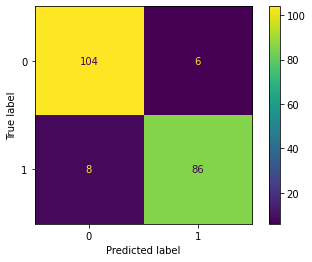

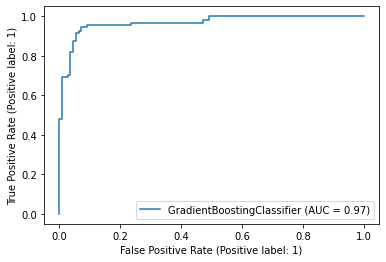

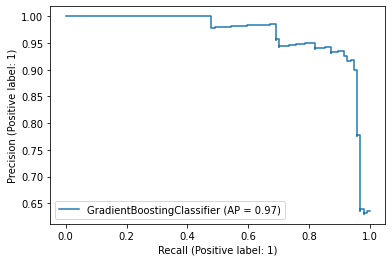

In [76]:
gradientBoostingClassifier(X_train, X_test, X_train_scaled, X_test_scaled, y_train, y_test)

In [77]:
def logisticRegression(X_train, X_test, X_train_scaled, X_test_scaled, y_train, y_test):
  # Logistic Regression with best parameters using GridSearchCV
  LR_model = LogisticRegression() # Since Basic accuracy outcome gives the best model accuracy results, we will implement it 
  LR_model.fit(X_train_scaled, y_train)

  penalty = ["l1", "l2", "elasticnet"]
  l1_ratio = np.linspace(0, 1, 20)
  C = np.logspace(0, 10, 20)

  param_grid = {"penalty" : penalty,
              #"l1_ratio" : l1_ratio,
              "C" : C}
              
  LR_grid_model = LogisticRegression(solver='saga', max_iter=5000, class_weight = "balanced")

  LR_grid_model = GridSearchCV(LR_grid_model, param_grid = param_grid)

  LR_grid_model.fit(X_train_scaled, y_train)

  print(colored('\033[1mBest Parameters of GridSearchCV for LR Model:\033[0m', 'blue'), colored(LR_grid_model.best_params_, 'cyan'))
  print("--------------------------------------------------------------------------------------------------------------------")
  print(colored('\033[1mBest Estimator of GridSearchCV for LR Model:\033[0m', 'blue'), colored(LR_grid_model.best_estimator_, 'cyan'))

  y_pred = LR_grid_model.predict(X_test_scaled)
  y_train_pred = LR_grid_model.predict(X_train_scaled)

  log_grid_f1 = f1_score(y_test, y_pred)
  log_grid_acc = accuracy_score(y_test, y_pred)
  log_grid_recall = recall_score(y_test, y_pred)
  log_grid_auc = roc_auc_score(y_test, y_pred)

  print(confusion_matrix(y_test, y_pred))
  print("\033[1m--------------------------------------------------------\033[0m")
  print(classification_report(y_test, y_pred))
  print("\033[1m--------------------------------------------------------\033[0m")

  plot_confusion_matrix(LR_grid_model, X_test_scaled, y_test)

  train_val(y_train, y_train_pred, y_test, y_pred)

  plot_roc_curve(LR_model, X_test_scaled, y_test, response_method='auto');

  plot_precision_recall_curve(LR_model, X_test_scaled, y_test);

  print(cross_val_score(LR_model, X_train, y_train))


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1473, in fit
    % self.l1_ratio
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_sea

Best Parameters of GridSearchCV for LR Model: {'C': 1.0, 'penalty': 'l2'}
--------------------------------------------------------------------------------------------------------------------
Best Estimator of GridSearchCV for LR Model: LogisticRegression(class_weight='balanced', max_iter=5000, solver='saga')
[[97 13]
 [13 81]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       110
           1       0.86      0.86      0.86        94

    accuracy                           0.87       204
   macro avg       0.87      0.87      0.87       204
weighted avg       0.87      0.87      0.87       204

--------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[0.84662577 0.8404908  0.83950617 0.87654321 0.90123457]


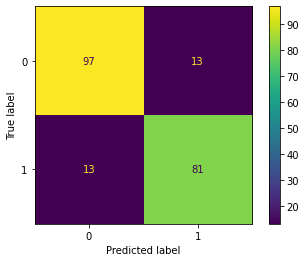

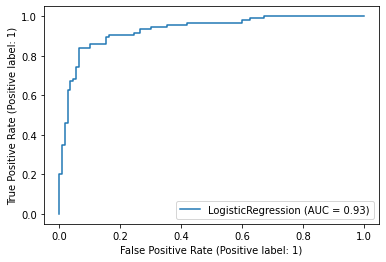

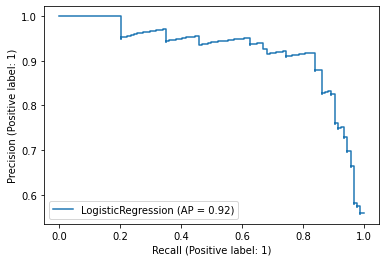

In [78]:
logisticRegression(X_train, X_test, X_train_scaled, X_test_scaled, y_train, y_test)

In [79]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers



In [80]:
def make_model():
    # create model
    model = Sequential()
    model.add(Dense(32, input_dim=78, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dense(16, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dense(2, activation='softmax'))
    
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

nn_model = make_model()

print(nn_model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                2528      
                                                                 
 dense_9 (Dense)             (None, 16)                528       
                                                                 
 dense_10 (Dense)            (None, 8)                 136       
                                                                 
 dense_11 (Dense)            (None, 2)                 18        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________
None


In [81]:
X_test = np.asarray(X_test).astype(np.float32)
X_train = np.asarray(X_train).astype(np.float32)


Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)

Y_test = np.asarray(Y_test).astype(np.float32)
Y_train = np.asarray(Y_train).astype(np.float32)

In [82]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(2)

X_test = pf.fit_transform(X_test)
X_train = pf.fit_transform(X_train)


In [83]:

training = nn_model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=1000, batch_size=10)

Epoch 1/1000
82/82 [==============================] - 3s 11ms/step - loss: 8.8782 - accuracy: 0.5456 - val_loss: 0.7717 - val_accuracy: 0.4559
Epoch 2/1000
82/82 [==============================] - 0s 5ms/step - loss: 0.7659 - accuracy: 0.5665 - val_loss: 0.6888 - val_accuracy: 0.7206
Epoch 3/1000
82/82 [==============================] - 1s 10ms/step - loss: 0.6779 - accuracy: 0.6675 - val_loss: 0.6225 - val_accuracy: 0.6814
Epoch 4/1000
82/82 [==============================] - 1s 9ms/step - loss: 0.6298 - accuracy: 0.7180 - val_loss: 0.5816 - val_accuracy: 0.7794
Epoch 5/1000
82/82 [==============================] - 1s 8ms/step - loss: 0.8000 - accuracy: 0.7340 - val_loss: 0.5877 - val_accuracy: 0.7549
Epoch 6/1000
82/82 [==============================] - 0s 5ms/step - loss: 0.7477 - accuracy: 0.7377 - val_loss: 0.5623 - val_accuracy: 0.7353
Epoch 7/1000
82/82 [==============================] - 0s 4ms/step - loss: 0.5786 - accuracy: 0.7660 - val_loss: 0.5588 - val_accuracy: 0.7696
Epoc

              precision    recall  f1-score   support

           0       0.89      0.82      0.85       110
           1       0.81      0.88      0.84        94

    accuracy                           0.85       204
   macro avg       0.85      0.85      0.85       204
weighted avg       0.85      0.85      0.85       204



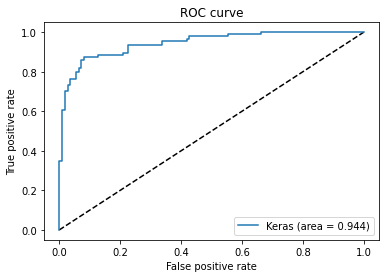

In [84]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay

y_pred = nn_model.predict(X_test)
y_pred_label = np.argmax(y_pred, axis=-1)
print(classification_report(y_test, y_pred_label))

fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test.tolist(), y_pred.T[1], pos_label=1)
auc_keras = auc(fpr_keras, tpr_keras)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

#roc_display = RocCurveDisplay(fpr=fpr_keras, tpr=tpr_keras).plot()